<a href="https://colab.research.google.com/github/aarsanjani/meansquares/blob/master/version2/feature_engineering/CA_Features_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal:

This colab is used to do diffirent visualizations of the features of CA Combined and Maryland Data



## Mount Google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler as ss
import itertools
from scipy import linalg
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import numpy as np
import matplotlib.pyplot as plt

# 1.Load data - Combined CA Data

## 1.1Preprocessed Data

In [4]:
CA_combined_data = pd.read_csv('/content/drive/Shared drives/CMPE 295- Master Project/projectdata-2021/CA_alldatasets_Jan13.csv',low_memory=False)
CA_combined_data.head()

,Date,Province_State,FIPS,New cases,County Name,population,mask_rule_active,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2020-03-01,California,6001,0,Alameda County,1671329,0,3.684,58,6.0,9.0,15.0,1.0,4.0,0.0
1,2020-03-02,California,6001,0,Alameda County,1671329,0,6.182,98,4.0,7.0,7.0,-1.0,3.0,0.0
2,2020-03-03,California,6001,1,Alameda County,1671329,0,6.271,100,5.0,12.0,41.0,0.0,1.0,-1.0
3,2020-03-04,California,6001,0,Alameda County,1671329,0,6.209,99,1.0,6.0,23.0,-3.0,1.0,0.0
4,2020-03-05,California,6001,0,Alameda County,1671329,0,6.654,106,1.0,6.0,12.0,-5.0,-1.0,1.0


In [5]:
CA_combined_data.dtypes

Date                                                   object
Province_State                                         object
FIPS                                                    int64
New cases                                               int64
County Name                                            object
population                                              int64
mask_rule_active                                        int64
m50                                                   float64
m50_index                                               int64
retail_and_recreation_percent_change_from_baseline    float64
grocery_and_pharmacy_percent_change_from_baseline     float64
parks_percent_change_from_baseline                    float64
transit_stations_percent_change_from_baseline         float64
workplaces_percent_change_from_baseline               float64
residential_percent_change_from_baseline              float64
dtype: object

## 1.2Labeled  Data

In [6]:
CA_labeled_data = pd.read_csv('/content/drive/Shared drives/CMPE 295- Master Project/projectdata-2021/CA_CombinedData_Labeled_CDCGuideline_Jan15.csv',low_memory=False)
CA_labeled_data.head()

,Date,Province_State,FIPS,County Name,population,mask_rule_active,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,New Cases/100k population,rolling_avg_new_cases/100k,New cases,growth_label
0,2020-03-01,California,6001,Alameda County,1671329,0,3.684,58,6.0,9.0,15.0,1.0,4.0,0.0,0.000000,0.0,0.0,minimal
1,2020-03-02,California,6001,Alameda County,1671329,0,6.182,98,4.0,7.0,7.0,-1.0,3.0,0.0,0.000000,0.0,0.0,minimal
2,2020-03-03,California,6001,Alameda County,1671329,0,6.271,100,5.0,12.0,41.0,0.0,1.0,-1.0,0.059833,0.0,1.0,minimal
3,2020-03-04,California,6001,Alameda County,1671329,0,6.209,99,1.0,6.0,23.0,-3.0,1.0,0.0,0.000000,0.0,0.0,minimal
4,2020-03-05,California,6001,Alameda County,1671329,0,6.654,106,1.0,6.0,12.0,-5.0,-1.0,1.0,0.000000,0.0,0.0,minimal


In [7]:
CA_labeled_data.dtypes

Date                                                   object
Province_State                                         object
FIPS                                                    int64
County Name                                            object
population                                              int64
mask_rule_active                                        int64
m50                                                   float64
m50_index                                               int64
retail_and_recreation_percent_change_from_baseline    float64
grocery_and_pharmacy_percent_change_from_baseline     float64
parks_percent_change_from_baseline                    float64
transit_stations_percent_change_from_baseline         float64
workplaces_percent_change_from_baseline               float64
residential_percent_change_from_baseline              float64
New Cases/100k population                             float64
rolling_avg_new_cases/100k                            float64
New case

In [8]:
CA_labeled_data.shape

(15821, 18)

## Preprocessing data 

* drop na
* convert categorical code

In [9]:
CA_combined_data = CA_combined_data.dropna()

In [10]:
CA_combined_data.dtypes

Date                                                   object
Province_State                                         object
FIPS                                                    int64
New cases                                               int64
County Name                                            object
population                                              int64
mask_rule_active                                        int64
m50                                                   float64
m50_index                                               int64
retail_and_recreation_percent_change_from_baseline    float64
grocery_and_pharmacy_percent_change_from_baseline     float64
parks_percent_change_from_baseline                    float64
transit_stations_percent_change_from_baseline         float64
workplaces_percent_change_from_baseline               float64
residential_percent_change_from_baseline              float64
dtype: object

In [ ]:
CA_combined_data.shape

(10478, 15)

# Visualization: Combined Data

## Filter data

In [11]:
CA_combined_data.Date.unique()

array(['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
       '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
       '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
       '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',
       '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
       '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
       '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28',
       '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01',
       '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05',
       '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09',
       '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13',
       '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17',
       '2020-04-18', '2020-04-19', '2020-04-21', '2020-04-22',
       '2020-04-23', '2020-04-24', '2020-04-25', '2020-04-26',
       '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30',
       '2020-05-01', '2020-05-02', '2020-05-03', '2020-

In [14]:
date_list = ['2020-12-01', '2020-12-02', '2020-12-03', '2020-12-04',
       '2020-12-05', '2020-12-06', '2020-12-07', '2020-12-08',
       '2020-12-09', '2020-12-10', '2020-12-19', '2020-12-20',
       '2020-12-21', '2020-12-22', '2020-12-23', '2020-12-24',
       '2020-12-25', '2020-12-26', '2020-12-27', '2020-12-28',
       '2020-12-29', '2020-12-30', '2020-12-31', '2021-01-01',
       '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05']
CA_combined_data_filtered= CA_combined_data[CA_combined_data.Date.isin(date_list)]
CA_labeled_data_filtered = CA_labeled_data[CA_labeled_data.Date.isin(date_list)]

In [13]:
CA_combined_data_filtered = CA_combined_data_filtered[['FIPS','population','mask_rule_active','m50','m50_index','Date',
                                              'retail_and_recreation_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline',
                                              'parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline',
                                              'residential_percent_change_from_baseline','New cases']]

In [17]:
date_list = ['2020-10-01', '2020-10-02', '2020-10-03', '2020-10-04',
       '2020-10-05', '2020-10-06', '2020-10-07', '2020-10-09',
       '2020-10-10', '2020-10-11', '2020-10-12', '2020-10-13',
       '2020-10-14', '2020-10-15', '2020-10-16', '2020-10-17',
       '2020-10-18', '2020-10-19', '2020-10-20', '2020-10-21',
       '2020-10-22', '2020-10-23', '2020-10-24', '2020-10-25',
       '2020-10-26', '2020-10-27', '2020-10-28', '2020-10-29',
       '2020-10-30', '2020-10-31']


CA_labeled_data_filtered = CA_labeled_data[CA_labeled_data.Date.isin(date_list)]

In [15]:
CA_labeled_data_filtered.columns

Index(['Date', 'Province_State', 'FIPS', 'County Name', 'population',
       'mask_rule_active', 'm50', 'm50_index',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'New Cases/100k population',
       'rolling_avg_new_cases/100k', 'New cases', 'growth_label'],
      dtype='object')

['minimal' 0 'moderate' 1 'substantial' 2 'widespread' 3]

In [29]:
CA_labeled_data_filtered['growth_label'].unique()

array(['substantial', 'moderate', 'minimal', 'widespread'], dtype=object)

In [24]:
CA_labeled_data_filtered['County Name'].unique()

array(['Alameda County', 'Amador County', 'Butte County',
       'Calaveras County', 'Colusa County', 'Contra Costa County',
       'Del Norte County', 'El Dorado County', 'Fresno County',
       'Glenn County', 'Humboldt County', 'Imperial County',
       'Inyo County', 'Kern County', 'Kings County', 'Lake County',
       'Lassen County', 'Los Angeles County', 'Madera County',
       'Marin County', 'Mariposa County', 'Mendocino County',
       'Merced County', 'Mono County', 'Monterey County', 'Napa County',
       'Nevada County', 'Orange County', 'Placer County', 'Plumas County',
       'Riverside County', 'Sacramento County', 'San Benito County',
       'San Bernardino County', 'San Diego County',
       'San Francisco County', 'San Joaquin County',
       'San Luis Obispo County', 'San Mateo County',
       'Santa Barbara County', 'Santa Clara County', 'Santa Cruz County',
       'Shasta County', 'Siskiyou County', 'Solano County',
       'Sonoma County', 'Stanislaus County', 'Su

In [31]:
CA_labeled_data_level0 = CA_labeled_data_filtered[(CA_labeled_data_filtered['growth_label']=='minimal') ]
print(CA_labeled_data_level0.shape)
CA_labeled_data_level0['County Name'].unique()

(63, 18)


array(['Amador County', 'Calaveras County', 'Humboldt County',
       'Lassen County', 'Mariposa County', 'Plumas County',
       'Siskiyou County', 'Tuolumne County'], dtype=object)

In [35]:
CA_labeled_data_level0 = CA_labeled_data_filtered[(CA_labeled_data_filtered['growth_label']=='minimal') & (CA_labeled_data_filtered['County Name']== 'Amador County')]
print(CA_labeled_data_level0.shape)

CA_labeled_data_level3 = CA_labeled_data_filtered[(CA_labeled_data_filtered['growth_label']=='widespread') & (CA_labeled_data_filtered['County Name']== 'Amador County')]
print(CA_labeled_data_level3.shape)

(5, 18)
(4, 18)


## Correlation Plot

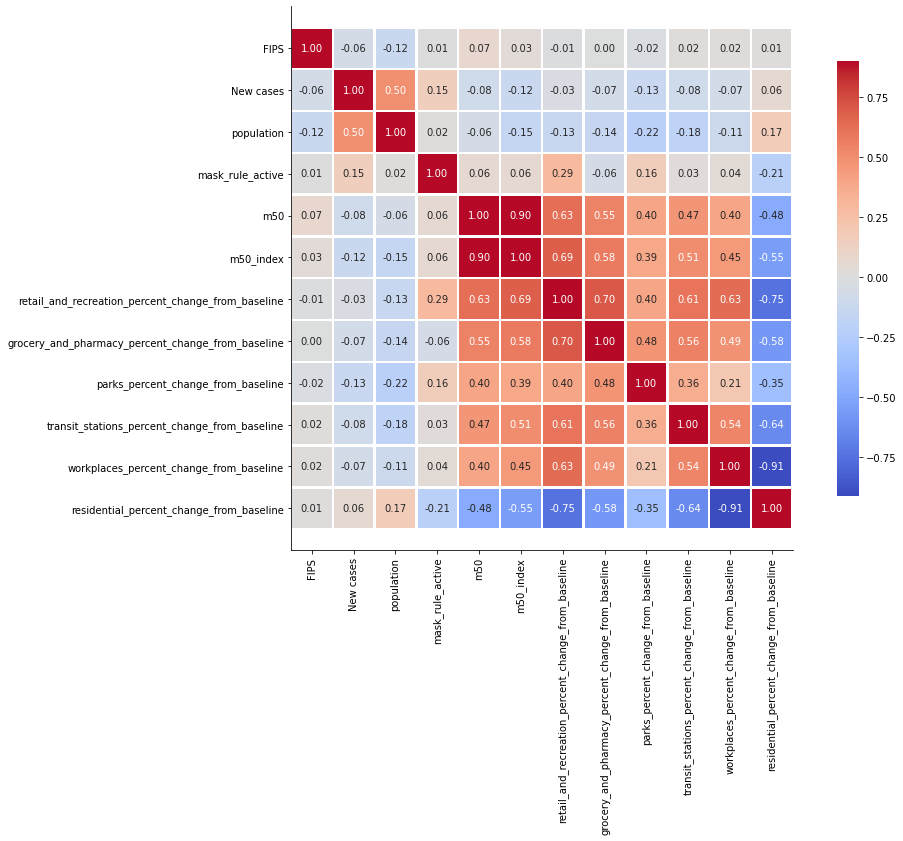

In [ ]:

corr = CA_combined_data.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=1.5, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

## Box Plot

https://machinelearningmastery.com/time-series-data-visualization-with-python/

##  TODO: Let's filter mobility, SD separately, and do the box plot - drop FIPS

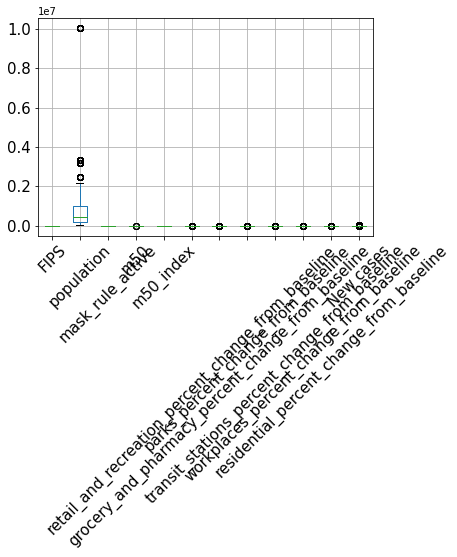

In [ ]:
CA_combined_data_filtered.boxplot(grid=True, rot=45, fontsize=15)

## For paper visualization

* Let's filter the SuperSpread data and do Box plot
* Let's filter the lowspread data and do box plot
* filter dataframe for transition from low -> superspread data and plot lineplot to see variation 

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1fee4fbe0>,
      dtype=object)

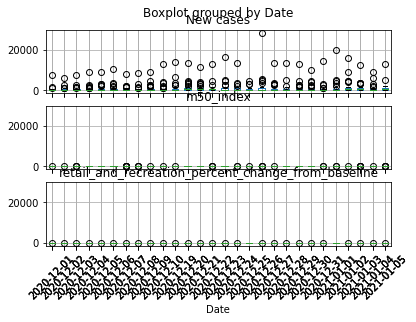

In [ ]:
CA_combined_data_filtered.boxplot(column=['New cases', 'm50_index','retail_and_recreation_percent_change_from_baseline'], by='Date',rot=45,
                     layout=(3, 1))

## Histogram

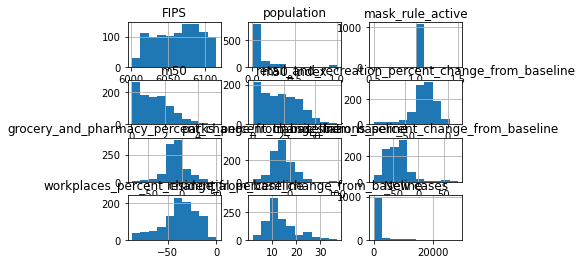

In [ ]:
CA_combined_data_filtered.hist()
plt.show()

## BarPlot

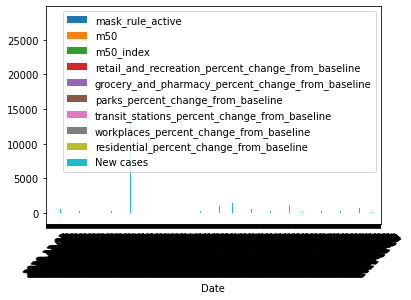

In [ ]:
CA_combined_data_filtered.plot(x="Date", y=['mask_rule_active','m50','m50_index',
                                              'retail_and_recreation_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline',
                                              'parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline',
                                              'residential_percent_change_from_baseline','New cases'],rot=45, kind="bar")

## Line Plot

#### 1.'New Cases/100k population': Minimal vs. Widespread

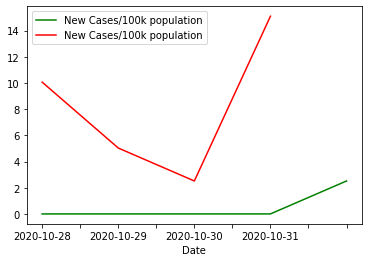

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

# gca stands for 'get current axis'
ax = plt.gca()

CA_labeled_data_level0.plot(kind='line',x='Date',y='New Cases/100k population',color='green',ax=ax)
CA_labeled_data_level3.plot(kind='line',x='Date',y='New Cases/100k population', color='red', ax=ax)

plt.show()

#### 2.m50_index: Minimal vs. Widespread

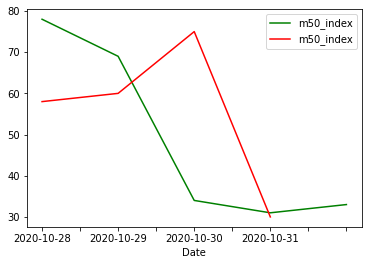

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

# gca stands for 'get current axis'
ax = plt.gca()

CA_labeled_data_level0.plot(kind='line',x='Date',y='m50_index',color='green',ax=ax)
CA_labeled_data_level3.plot(kind='line',x='Date',y='m50_index', color='red', ax=ax)

plt.show()

#### 3.mask_rule_active: Minimal vs. Widespread

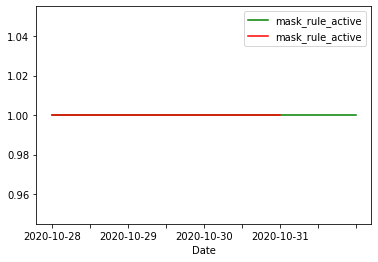

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

# gca stands for 'get current axis'
ax = plt.gca()

CA_labeled_data_level0.plot(kind='line',x='Date',y='mask_rule_active',color='green',ax=ax)
CA_labeled_data_level3.plot(kind='line',x='Date',y='mask_rule_active', color='red', ax=ax)

plt.show()

#### 4.grocery_and_pharmacy_percent_change_from_baseline: Minimal vs. Widespread

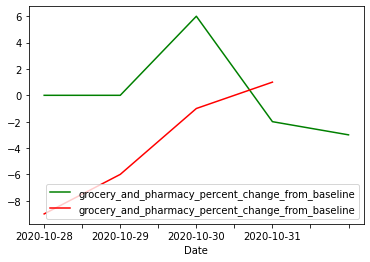

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

# gca stands for 'get current axis'
ax = plt.gca()

CA_labeled_data_level0.plot(kind='line',x='Date',y='grocery_and_pharmacy_percent_change_from_baseline',color='green',ax=ax)
CA_labeled_data_level3.plot(kind='line',x='Date',y='grocery_and_pharmacy_percent_change_from_baseline', color='red', ax=ax)

plt.show()

## Next Try- with All County

https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

In [43]:
CA_combined_data_filtered_new = CA_labeled_data_filtered

In [44]:
CA_combined_data_filtered.dtypes

Date                                                   object
Province_State                                         object
FIPS                                                    int64
New cases                                               int64
County Name                                            object
population                                              int64
mask_rule_active                                        int64
m50                                                   float64
m50_index                                               int64
retail_and_recreation_percent_change_from_baseline    float64
grocery_and_pharmacy_percent_change_from_baseline     float64
parks_percent_change_from_baseline                    float64
transit_stations_percent_change_from_baseline         float64
workplaces_percent_change_from_baseline               float64
residential_percent_change_from_baseline              float64
dtype: object

In [45]:
CA_combined_data_filtered_new['Date'] =  pd.to_datetime(CA_combined_data_filtered_new['Date'], format='%Y/%m/%d')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
CA_combined_data_filtered_new = CA_combined_data_filtered_new.set_index('Date')
CA_combined_data_filtered_new.head(3)

,Province_State,FIPS,County Name,population,mask_rule_active,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,New Cases/100k population,rolling_avg_new_cases/100k,New cases,growth_label
Date,,,,,,,,,,,,,,,,,
2020-10-01,California,6001,Alameda County,1671329,1,3.086,49,-34.0,-14.0,-13.0,-62.0,-51.0,20.0,4.487447,4.333591,75.0,substantial
2020-10-02,California,6001,Alameda County,1671329,1,3.366,53,-37.0,-15.0,-24.0,-60.0,-47.0,19.0,2.991631,4.102809,50.0,substantial
2020-10-03,California,6001,Alameda County,1671329,1,1.673,26,-37.0,-14.0,-11.0,-51.0,-16.0,8.0,6.761087,4.145546,113.0,substantial


In [47]:
CA_combined_data_filtered_new.index

DatetimeIndex(['2020-10-01', '2020-10-02', '2020-10-03', '2020-10-04',
               '2020-10-05', '2020-10-06', '2020-10-07', '2020-10-09',
               '2020-10-10', '2020-10-11',
               ...
               '2020-10-22', '2020-10-23', '2020-10-24', '2020-10-25',
               '2020-10-26', '2020-10-27', '2020-10-28', '2020-10-29',
               '2020-10-30', '2020-10-31'],
              dtype='datetime64[ns]', name='Date', length=1610, freq=None)

In [48]:
# Display a random sampling of 5 rows
CA_combined_data_filtered_new.sample(5, random_state=0)

,Province_State,FIPS,County Name,population,mask_rule_active,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,New Cases/100k population,rolling_avg_new_cases/100k,New cases,growth_label
Date,,,,,,,,,,,,,,,,,
2020-10-24,California,6067,Sacramento County,1552058,1,2.980,42,-25.0,-6.0,11.0,-31.0,-15.0,3.0,10.953199,9.867083,170.0,widespread
2020-10-28,California,6081,San Mateo County,766573,1,2.178,32,-30.0,-12.0,4.0,-67.0,-54.0,21.0,4.435324,5.851647,34.0,substantial
2020-10-21,California,6085,Santa Clara County,1927852,1,2.005,28,-36.0,-14.0,4.0,-63.0,-57.0,23.0,6.898870,5.854036,133.0,substantial
2020-10-29,California,6053,Monterey County,434061,1,2.701,52,-20.0,-4.0,-6.0,-11.0,-31.0,7.0,15.205236,10.301383,66.0,widespread
2020-10-19,California,6025,Imperial County,181215,1,1.770,53,-33.0,-22.0,-73.0,-37.0,-32.0,10.0,35.868995,20.102404,65.0,widespread


In [49]:
CA_combined_data_filtered_new.loc['2021-01-01':'2021-01-03']

,Province_State,FIPS,County Name,population,mask_rule_active,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,New Cases/100k population,rolling_avg_new_cases/100k,New cases,growth_label
Date,,,,,,,,,,,,,,,,,


In [50]:
CA_combined_data_filtered_new.columns

Index(['Province_State', 'FIPS', 'County Name', 'population',
       'mask_rule_active', 'm50', 'm50_index',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'New Cases/100k population',
       'rolling_avg_new_cases/100k', 'New cases', 'growth_label'],
      dtype='object')

In [53]:
CA_labeled_data_level0 = CA_combined_data_filtered_new[(CA_combined_data_filtered_new['growth_label']=='minimal')]# & (CA_combined_data_filtered_new['County Name']== 'Amador County')]
print(CA_labeled_data_level0.shape)

CA_labeled_data_level3 = CA_combined_data_filtered_new[(CA_combined_data_filtered_new['growth_label']=='widespread')]# & (CA_combined_data_filtered_new['County Name']== 'Amador County')]
print(CA_labeled_data_level3.shape)

(63, 17)
(728, 17)


### Daily Trend

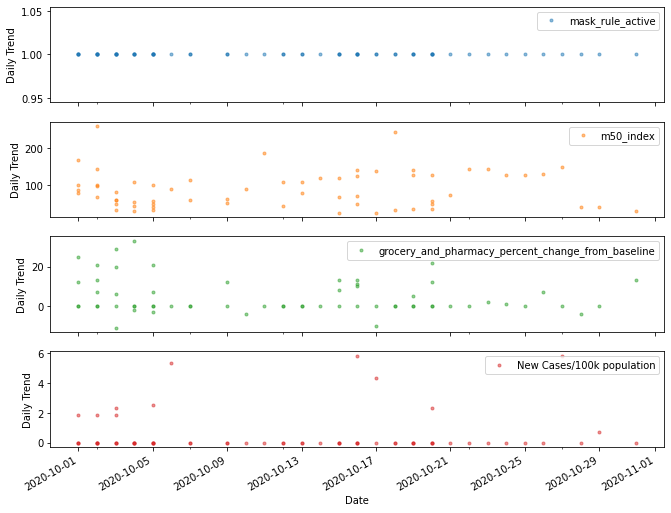

In [55]:
cols_plot = ['mask_rule_active','m50_index','grocery_and_pharmacy_percent_change_from_baseline','New Cases/100k population']
axes = CA_labeled_data_level0[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Trend')

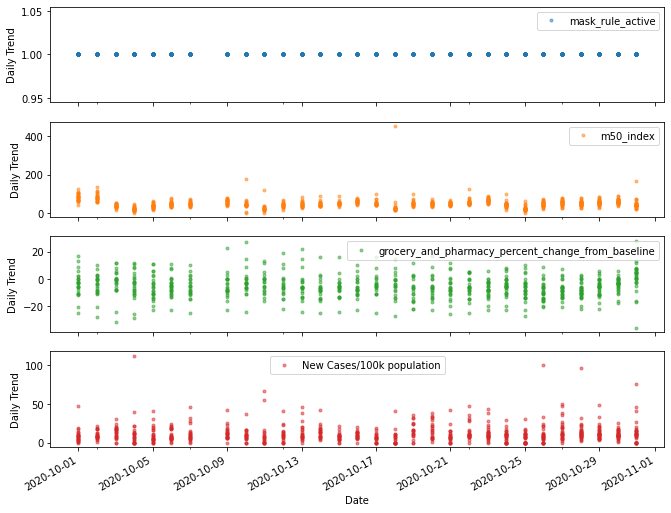

In [56]:
cols_plot = ['mask_rule_active','m50_index','grocery_and_pharmacy_percent_change_from_baseline','New Cases/100k population']
axes = CA_labeled_data_level3[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Trend')

### Seasonality

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

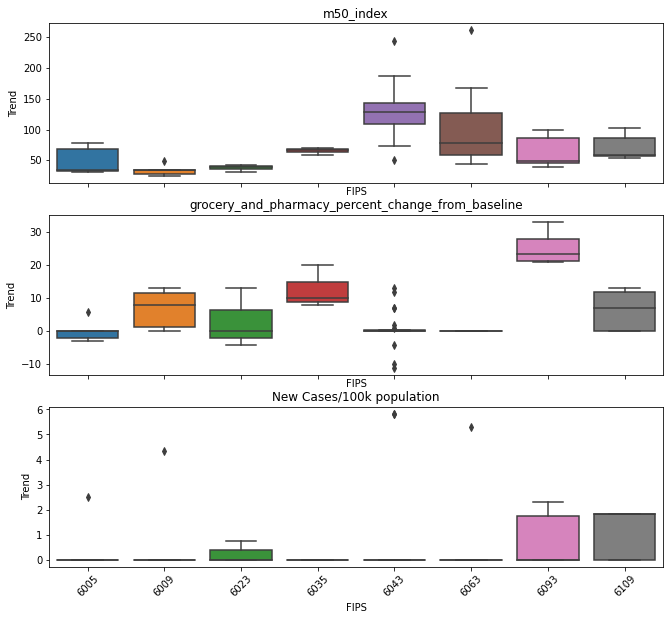

In [59]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['m50_index','grocery_and_pharmacy_percent_change_from_baseline','New Cases/100k population'], axes):
  sns.boxplot(data=CA_labeled_data_level0, x='FIPS', y=name, ax=ax)
  ax.set_ylabel('Trend')
  ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 <a list of 45 Text major ticklabel objects>)

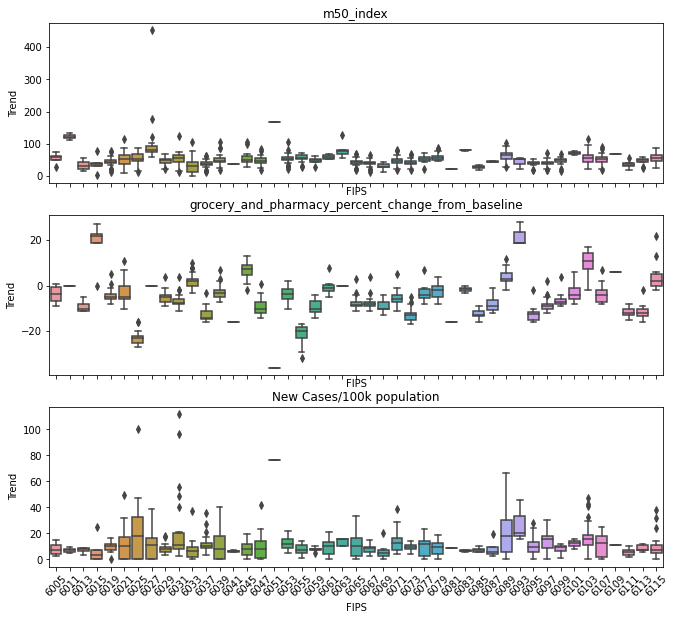

In [60]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['m50_index','grocery_and_pharmacy_percent_change_from_baseline','New Cases/100k population'], axes):
  sns.boxplot(data=CA_labeled_data_level3, x='FIPS', y=name, ax=ax)
  ax.set_ylabel('Trend')
  ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
if ax != axes[-1]:
    ax.set_xlabel('')
plt.xticks(rotation=45)

### Box Plot

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

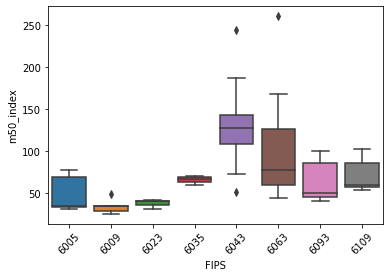

In [61]:
sns.boxplot(data=CA_labeled_data_level0, x='FIPS', y='m50_index')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 <a list of 45 Text major ticklabel objects>)

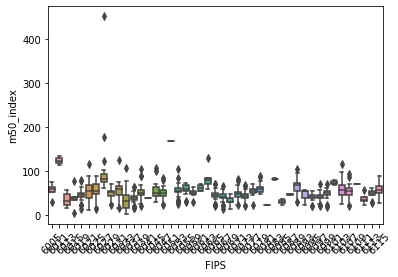

In [62]:
sns.boxplot(data=CA_labeled_data_level3, x='FIPS', y='m50_index')
plt.xticks(rotation=45)

### Resampling

In [ ]:
# Specify the data columns we want to include (i.e. exclude Year, Month, Weekday Name)
data_columns = ['m50_index','transit_stations_percent_change_from_baseline','New cases']
# Resample to weekly frequency, aggregating with mean
opsd_weekly_mean = CA_combined_data_filtered_new[data_columns].resample('W').mean()
opsd_weekly_mean.head(3)

,m50_index,transit_stations_percent_change_from_baseline,New cases
Date,,,
2020-12-06,33.947368,-36.964912,582.280702
2020-12-13,24.649351,-40.006494,734.012987
2020-12-20,18.959459,-31.972973,1087.175676


(array([737764., 737765., 737766., 737767., 737768., 737769.]),
 <a list of 6 Text major ticklabel objects>)

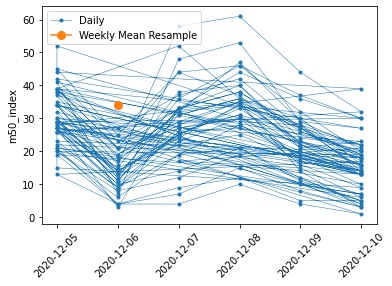

In [ ]:
# Start and end of the date range to extract
start, end = '2020-12-05', '2020-12-10'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(CA_combined_data_filtered_new.loc[start:end, 'm50_index'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(opsd_weekly_mean.loc[start:end, 'm50_index'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('m50_index')
ax.legend();
plt.xticks(rotation=45)

In [ ]:
# Compute the monthly sums, setting the value to NaN for any month which has
# fewer than 28 days of data
opsd_monthly = CA_combined_data_filtered_new[data_columns].resample('M').sum(min_count=28)
opsd_monthly.head(3)

,m50_index,transit_stations_percent_change_from_baseline,New cases
Date,,,
2020-12-31,21675,-34158.0,725972
2021-01-31,1471,-8008.0,201949


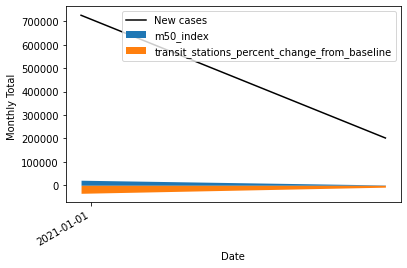

In [ ]:
import matplotlib.dates as mdates
fig, ax = plt.subplots()
ax.plot(opsd_monthly['New cases'], color='black', label='New cases')
opsd_monthly[['m50_index', 'transit_stations_percent_change_from_baseline']].plot.area(ax=ax, linewidth=0)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_ylabel('Monthly Total ');

# 2.Load data - Maryland Inertia Data

## 2.1Preprocessed Data

In [ ]:
CA_inertia_data = pd.read_csv('/content/drive/Shared drives/CMPE 295- Master Project/projectdata-2021/CA_processedMarylandData_Jan11.csv',low_memory=False)
CA_inertia_data.head()

,countyFIPS,County Name,State,population,CTFIPS,CTNAME,STFIPS,Social.distancing.index,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,New.COVID.cases,Population,X..change.in.consumption,date,Transit.mode.share,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,Population.density,Employment.density,X..hot.spots.1000.people,Hospital.beds.1000.people,ICUs.1000.people,X..contact.tracing.workers.1000.people,New.cases.1000.people,Active.cases.1000.people,X.days..decreasing.COVID.cases,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,Imported.COVID.cases,COVID.exposure.1000.people,X.days..decreasing.ILI.cases,Unemployment.claims.1000.people,Unemployment.rate,X..working.from.home,Cumulative.inflation.rate,COVID.death.rate
0,6001,Alameda County,CA,1671329,6001,Alameda County,6,50,32,2.41,26.1,0.4,38.0,0.20,2.21,0,1666753,-21.7,2020-01-01,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,NaN,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,0.9,3.9,5.7,0.3,0.0
1,6001,Alameda County,CA,1671329,6001,Alameda County,6,24,22,3.17,27.9,0.4,38.5,0.50,2.66,0,1666753,-5.8,2020-01-02,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,NaN,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,0.9,3.9,5.7,0.3,0.0
2,6001,Alameda County,CA,1671329,6001,Alameda County,6,21,21,3.28,27.2,0.4,41.0,0.51,2.78,0,1666753,-1.5,2020-01-03,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,NaN,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,0.9,3.9,5.7,0.3,0.0
3,6001,Alameda County,CA,1671329,6001,Alameda County,6,34,25,3.03,25.8,0.3,41.1,0.26,2.76,0,1666753,-2.2,2020-01-04,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,NaN,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,0.9,3.9,5.7,0.3,0.0
4,6001,Alameda County,CA,1671329,6001,Alameda County,6,44,29,2.72,24.5,0.4,35.8,0.24,2.48,0,1666753,-12.1,2020-01-05,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,NaN,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,1.3,3.9,5.7,0.3,0.0


In [ ]:
CA_inertia_data.dtypes

countyFIPS                                  int64
County Name                                object
State                                      object
population                                  int64
CTFIPS                                      int64
CTNAME                                     object
STFIPS                                      int64
Social.distancing.index                     int64
X..staying.home                             int64
Trips.person                              float64
X..out.of.county.trips                    float64
X..out.of.state.trips                     float64
Miles.person                              float64
Work.trips.person                         float64
Non.work.trips.person                     float64
New.COVID.cases                             int64
Population                                  int64
X..change.in.consumption                  float64
date                                       object
Transit.mode.share                        float64


## 2.2Labeled  Data

In [ ]:
CA_inertia_labeled_data = pd.read_csv('/content/drive/Shared drives/CMPE 295- Master Project/projectdata-2021/CA_MarylandData_Labeled_CDCGuideline_Jan15.csv',low_memory=False)
CA_inertia_labeled_data.head()

,County Name,State,population,CTFIPS,CTNAME,STFIPS,Social.distancing.index,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,New.COVID.cases,Population,X..change.in.consumption,date,Transit.mode.share,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,Population.density,Employment.density,X..hot.spots.1000.people,Hospital.beds.1000.people,ICUs.1000.people,X..contact.tracing.workers.1000.people,New.cases.1000.people,Active.cases.1000.people,X.days..decreasing.COVID.cases,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,Imported.COVID.cases,COVID.exposure.1000.people,X.days..decreasing.ILI.cases,Unemployment.claims.1000.people,Unemployment.rate,X..working.from.home,Cumulative.inflation.rate,COVID.death.rate,New Cases/100k population,rolling_avg_new_cases/100k,countyFIPS,growth_label
0,Alameda County,CA,1671329,6001,Alameda County,6,50,32,2.41,26.1,0.4,38.0,0.20,2.21,0,1666753,-21.7,2020-01-01,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,0.9,3.9,5.7,0.3,0.0,0.0,0.0,6001.0,minimal
1,Alameda County,CA,1671329,6001,Alameda County,6,24,22,3.17,27.9,0.4,38.5,0.50,2.66,0,1666753,-5.8,2020-01-02,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,0.9,3.9,5.7,0.3,0.0,0.0,0.0,6001.0,minimal
2,Alameda County,CA,1671329,6001,Alameda County,6,21,21,3.28,27.2,0.4,41.0,0.51,2.78,0,1666753,-1.5,2020-01-03,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,0.9,3.9,5.7,0.3,0.0,0.0,0.0,6001.0,minimal
3,Alameda County,CA,1671329,6001,Alameda County,6,34,25,3.03,25.8,0.3,41.1,0.26,2.76,0,1666753,-2.2,2020-01-04,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,0.9,3.9,5.7,0.3,0.0,0.0,0.0,6001.0,minimal
4,Alameda County,CA,1671329,6001,Alameda County,6,44,29,2.72,24.5,0.4,35.8,0.24,2.48,0,1666753,-12.1,2020-01-05,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,1.3,3.9,5.7,0.3,0.0,0.0,0.0,6001.0,minimal


In [ ]:
CA_inertia_labeled_data.dtypes

County Name                                object
State                                      object
population                                  int64
CTFIPS                                      int64
CTNAME                                     object
STFIPS                                      int64
Social.distancing.index                     int64
X..staying.home                             int64
Trips.person                              float64
X..out.of.county.trips                    float64
X..out.of.state.trips                     float64
Miles.person                              float64
Work.trips.person                         float64
Non.work.trips.person                     float64
New.COVID.cases                             int64
Population                                  int64
X..change.in.consumption                  float64
date                                       object
Transit.mode.share                        float64
X..people.older.than.60                     int64


In [ ]:
CA_inertia_labeled_data.shape

(21054, 50)

## Preprocessing data 

* drop na
* convert categorical code

In [ ]:
CA_inertia_labeled_data = CA_inertia_labeled_data.fillna(0)

,Date,Province_State,FIPS,Confirmed,Deaths,New cases,New deaths,mask_rule_active,CTFIPS,CTNAME,STFIPS,Social distancing index,% staying home,Trips/person,% out-of-county trips,% out-of-state trips,Miles/person,Work trips/person,Non-work trips/person,New COVID cases,Population,% change in consumption,date,Transit mode share,% people older than 60,Median income,% African Americans,% Hispanic Americans,% Male,Population density,Employment density,# hot spots/1000 people,Hospital beds/1000 people,ICUs/1000 people,# contact tracing workers/1000 people,# contact tracing workers/1000 people rank,% people older than 60 rank,COVID exposure/1000 people,#days: decreasing ILI cases,Unemployment claims/1000 people,Unemployment rate,% working from home,Cumulative inflation rate,COVID death rate,New cases/1000 people,Active cases/1000 people,#days: decreasing COVID cases,% hospital bed utilization,Testing capacity,Tests done/1000 people,% ICU utilization,Ventilator shortage,Imported COVID cases,growth_label,growth_code
0,2020-01-22,California,6001,0,0,0,0,0,6001,Alameda County,6,18,20,3.29,29.4,0.3,35.9,0.55,2.74,0,1666753,-2.9,2020-01-22,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0,12,0.0,0,1.2,3.9,5.7,0.3,0.0,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,drastic_decrement,0
1,2020-01-23,California,6001,0,0,0,0,0,6001,Alameda County,6,15,19,3.36,29.6,0.3,35.4,0.56,2.80,0,1666753,-0.8,2020-01-23,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0,12,0.0,0,1.2,3.9,5.7,0.3,0.0,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,drastic_decrement,0
2,2020-01-24,California,6001,0,0,0,0,0,6001,Alameda County,6,15,19,3.48,29.0,0.3,39.1,0.53,2.94,0,1666753,4.1,2020-01-24,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0,12,0.0,0,1.2,3.9,5.7,0.3,0.0,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,drastic_decrement,0
3,2020-01-25,California,6001,0,0,0,0,0,6001,Alameda County,6,30,24,3.16,26.6,0.3,36.3,0.27,2.88,0,1666753,2.0,2020-01-25,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0,12,0.0,0,1.2,3.9,5.7,0.3,0.0,0.0,0.0,1,54.0,0.0,0.0,0.0,0,0,drastic_decrement,0
4,2020-01-26,California,6001,0,0,0,0,0,6001,Alameda County,6,41,28,2.80,25.6,0.4,35.4,0.24,2.56,0,1666753,-9.3,2020-01-26,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0,12,0.0,0,1.1,3.9,5.7,0.3,0.0,0.0,0.0,2,54.0,0.0,0.0,0.0,0,0,drastic_decrement,0


In [ ]:
CA_inertia_labeled_data['growth_code'].unique()

array([0, 3, 2, 1], dtype=int8)

In [ ]:
CA_inertia_labeled_data.columns

Index(['County Name', 'State', 'population', 'CTFIPS', 'CTNAME', 'STFIPS',
       'Social.distancing.index', 'X..staying.home', 'Trips.person',
       'X..out.of.county.trips', 'X..out.of.state.trips', 'Miles.person',
       'Work.trips.person', 'Non.work.trips.person', 'New.COVID.cases',
       'Population', 'X..change.in.consumption', 'date', 'Transit.mode.share',
       'X..people.older.than.60', 'Median.income', 'X..African.Americans',
       'X..Hispanic.Americans', 'X..Male', 'Population.density',
       'Employment.density', 'X..hot.spots.1000.people',
       'Hospital.beds.1000.people', 'ICUs.1000.people',
       'X..contact.tracing.workers.1000.people', 'New.cases.1000.people',
       'Active.cases.1000.people', 'X.days..decreasing.COVID.cases',
       'X..hospital.bed.utilization', 'Testing.capacity',
       'Tests.done.1000.people', 'X..ICU.utilization', 'Ventilator.shortage',
       'Imported.COVID.cases', 'COVID.exposure.1000.people',
       'X.days..decreasing.ILI.cases',

## Feature Importance: Gini-Coefficient

In [ ]:
CA_inertia_data.columns

Index(['countyFIPS', 'County Name', 'State', 'population', 'CTFIPS', 'CTNAME',
       'STFIPS', 'Social.distancing.index', 'X..staying.home', 'Trips.person',
       'X..out.of.county.trips', 'X..out.of.state.trips', 'Miles.person',
       'Work.trips.person', 'Non.work.trips.person', 'New.COVID.cases',
       'Population', 'X..change.in.consumption', 'date', 'Transit.mode.share',
       'X..people.older.than.60', 'Median.income', 'X..African.Americans',
       'X..Hispanic.Americans', 'X..Male', 'Population.density',
       'Employment.density', 'X..hot.spots.1000.people',
       'Hospital.beds.1000.people', 'ICUs.1000.people',
       'X..contact.tracing.workers.1000.people', 'New.cases.1000.people',
       'Active.cases.1000.people', 'X.days..decreasing.COVID.cases',
       'X..hospital.bed.utilization', 'Testing.capacity',
       'Tests.done.1000.people', 'X..ICU.utilization', 'Ventilator.shortage',
       'Imported.COVID.cases', 'COVID.exposure.1000.people',
       'X.days..decreasi

In [ ]:
CA_inertia_data.dtypes

countyFIPS                                  int64
County Name                                object
State                                      object
population                                  int64
CTFIPS                                      int64
CTNAME                                     object
STFIPS                                      int64
Social.distancing.index                     int64
X..staying.home                             int64
Trips.person                              float64
X..out.of.county.trips                    float64
X..out.of.state.trips                     float64
Miles.person                              float64
Work.trips.person                         float64
Non.work.trips.person                     float64
New.COVID.cases                             int64
Population                                  int64
X..change.in.consumption                  float64
date                                       object
Transit.mode.share                        float64


In [ ]:
def gini(list_of_values):
    sorted_list = sorted(list_of_values)
    height, area = 0, 0
    for value in sorted_list:
        height += value
        area += height - value / 2.
    fair_area = height * len(list_of_values) / 2.
    return (fair_area - area) / fair_area

In [ ]:
feature_cols=['countyFIPS','population','Social.distancing.index', 'X..staying.home', 'Trips.person',
       'X..out.of.county.trips', 'X..out.of.state.trips', 'Miles.person',
       'Work.trips.person', 'Non.work.trips.person', 'New.COVID.cases',
       'Population', 'X..change.in.consumption', 'Transit.mode.share',
       'X..people.older.than.60', 'Median.income', 'X..African.Americans',
       'X..Hispanic.Americans', 'X..Male', 'Population.density',
       'Employment.density', 'X..hot.spots.1000.people',
       'Hospital.beds.1000.people', 'ICUs.1000.people',
        'New.cases.1000.people',
       'Active.cases.1000.people', 'X.days..decreasing.COVID.cases',
       'X..hospital.bed.utilization', 'Testing.capacity',
       'Tests.done.1000.people', 'X..ICU.utilization', 'Ventilator.shortage',
       'Imported.COVID.cases', 'COVID.exposure.1000.people',
       'X.days..decreasing.ILI.cases', 'Unemployment.claims.1000.people',
       'Unemployment.rate', 'X..working.from.home',
       'Cumulative.inflation.rate', 'COVID.death.rate']
gini_values = []
for col in feature_cols:
  dataset = CA_inertia_data[col].values.tolist()
  value = gini(dataset)
  print('cols ',col,' - gini coeff is :',value)
  gini_values.append(value)

cols  countyFIPS  - gini coeff is : 0.003190423606288635
cols  population  - gini coeff is : 0.7271503279831434
cols  Social.distancing.index  - gini coeff is : 0.2101171823534342
cols  X..staying.home  - gini coeff is : 0.12849262222403574
cols  Trips.person  - gini coeff is : 0.08263099390364957
cols  X..out.of.county.trips  - gini coeff is : 0.2598636242639775
cols  X..out.of.state.trips  - gini coeff is : 0.781262587537032
cols  Miles.person  - gini coeff is : 0.1947003935074699
cols  Work.trips.person  - gini coeff is : 0.21275655792872486
cols  Non.work.trips.person  - gini coeff is : 0.08391715245194091
cols  New.COVID.cases  - gini coeff is : 0.9029034514283721
cols  Population  - gini coeff is : 0.7274984244599945
cols  X..change.in.consumption  - gini coeff is : -1.4436803085730106
cols  Transit.mode.share  - gini coeff is : 0.662719746084874
cols  X..people.older.than.60  - gini coeff is : 0.1587058941459503
cols  Median.income  - gini coeff is : 0.15590487167885286
cols  X.

## Feature Importance: Random Forest classifier(Gini Score)

* old for reference

inertia_feature_labels = ['mask_rule_active','Social distancing index','% staying home', 'Trips/person', '% out-of-county trips',
       '% out-of-state trips', 'Miles/person', 'Work trips/person','Non-work trips/person','% change in consumption',
       'Transit mode share','% people older than 60', 'Median income', '% African Americans', '% Hispanic Americans',
       '% Male', 'Population density','Employment density', '# hot spots/1000 people','Hospital beds/1000 people', 'ICUs/1000 people',
       '# contact tracing workers/1000 people rank','% people older than 60 rank', 'COVID exposure/1000 people',
       'Unemployment claims/1000 people', 'Unemployment rate','% working from home', 'Cumulative inflation rate',
       '% hospital bed utilization', 'Testing capacity','Tests done/1000 people', '% ICU utilization', 'Ventilator shortage'
       ]

In [ ]:
CA_inertia_labeled_data['growth_code'] = CA_inertia_labeled_data['growth_label'].astype('category').cat.codes
CA_inertia_labeled_data.head()

,County Name,State,population,CTFIPS,CTNAME,STFIPS,Social.distancing.index,X..staying.home,Trips.person,X..out.of.county.trips,X..out.of.state.trips,Miles.person,Work.trips.person,Non.work.trips.person,New.COVID.cases,Population,X..change.in.consumption,date,Transit.mode.share,X..people.older.than.60,Median.income,X..African.Americans,X..Hispanic.Americans,X..Male,Population.density,Employment.density,X..hot.spots.1000.people,Hospital.beds.1000.people,ICUs.1000.people,X..contact.tracing.workers.1000.people,New.cases.1000.people,Active.cases.1000.people,X.days..decreasing.COVID.cases,X..hospital.bed.utilization,Testing.capacity,Tests.done.1000.people,X..ICU.utilization,Ventilator.shortage,Imported.COVID.cases,COVID.exposure.1000.people,X.days..decreasing.ILI.cases,Unemployment.claims.1000.people,Unemployment.rate,X..working.from.home,Cumulative.inflation.rate,COVID.death.rate,New Cases/100k population,rolling_avg_new_cases/100k,countyFIPS,growth_label,growth_code
0,Alameda County,CA,1671329,6001,Alameda County,6,50,32,2.41,26.1,0.4,38.0,0.20,2.21,0,1666753,-21.7,2020-01-01,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,0.9,3.9,5.7,0.3,0.0,0.0,0.0,6001.0,minimal,0
1,Alameda County,CA,1671329,6001,Alameda County,6,24,22,3.17,27.9,0.4,38.5,0.50,2.66,0,1666753,-5.8,2020-01-02,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,0.9,3.9,5.7,0.3,0.0,0.0,0.0,6001.0,minimal,0
2,Alameda County,CA,1671329,6001,Alameda County,6,21,21,3.28,27.2,0.4,41.0,0.51,2.78,0,1666753,-1.5,2020-01-03,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,0.9,3.9,5.7,0.3,0.0,0.0,0.0,6001.0,minimal,0
3,Alameda County,CA,1671329,6001,Alameda County,6,34,25,3.03,25.8,0.3,41.1,0.26,2.76,0,1666753,-2.2,2020-01-04,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,0.9,3.9,5.7,0.3,0.0,0.0,0.0,6001.0,minimal,0
4,Alameda County,CA,1671329,6001,Alameda County,6,44,29,2.72,24.5,0.4,35.8,0.24,2.48,0,1666753,-12.1,2020-01-05,15.04,19,92574,10.5,22.5,49.11,2002,1155,131,2.05,0.22,0.0,0.0,0.0,0,54.0,0.0,0.0,0.0,0,0,0.0,0,1.3,3.9,5.7,0.3,0.0,0.0,0.0,6001.0,minimal,0


In [ ]:
CA_inertia_labeled_data.columns

Index(['County Name', 'State', 'population', 'CTFIPS', 'CTNAME', 'STFIPS',
       'Social.distancing.index', 'X..staying.home', 'Trips.person',
       'X..out.of.county.trips', 'X..out.of.state.trips', 'Miles.person',
       'Work.trips.person', 'Non.work.trips.person', 'New.COVID.cases',
       'Population', 'X..change.in.consumption', 'date', 'Transit.mode.share',
       'X..people.older.than.60', 'Median.income', 'X..African.Americans',
       'X..Hispanic.Americans', 'X..Male', 'Population.density',
       'Employment.density', 'X..hot.spots.1000.people',
       'Hospital.beds.1000.people', 'ICUs.1000.people',
       'X..contact.tracing.workers.1000.people', 'New.cases.1000.people',
       'Active.cases.1000.people', 'X.days..decreasing.COVID.cases',
       'X..hospital.bed.utilization', 'Testing.capacity',
       'Tests.done.1000.people', 'X..ICU.utilization', 'Ventilator.shortage',
       'Imported.COVID.cases', 'COVID.exposure.1000.people',
       'X.days..decreasing.ILI.cases',

In [ ]:
inertia_feature_labels = ['Social.distancing.index', 'X..staying.home', 'Trips.person',
       'X..out.of.county.trips', 'X..out.of.state.trips', 'Miles.person',
       'Work.trips.person', 'Non.work.trips.person', 'New.COVID.cases',
       'Population', 'X..change.in.consumption',  'Transit.mode.share',
       'X..people.older.than.60', 'Median.income', 'X..African.Americans',
       'X..Hispanic.Americans', 'X..Male', 'Population.density',
       'Employment.density', 'X..hot.spots.1000.people',
       'Hospital.beds.1000.people', 'ICUs.1000.people',
       'X..contact.tracing.workers.1000.people', 'New.cases.1000.people',
       'Active.cases.1000.people', 'X.days..decreasing.COVID.cases',
       'X..hospital.bed.utilization', 'Testing.capacity',
       'Tests.done.1000.people', 'X..ICU.utilization', 'Ventilator.shortage',
       'Imported.COVID.cases', 'COVID.exposure.1000.people',
       'X.days..decreasing.ILI.cases', 'Unemployment.claims.1000.people',
       'Unemployment.rate', 'X..working.from.home',
       'Cumulative.inflation.rate', 'COVID.death.rate',
       'New Cases/100k population'
       ]

inertia_target_column = ['growth_code']

X = CA_inertia_labeled_data[inertia_feature_labels]
y = CA_inertia_labeled_data[inertia_target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)


In [ ]:

#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 
clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='gini', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)
print(X_train.shape)
# Print the name and gini importance of each feature
for feature in zip(inertia_feature_labels, clf.feature_importances_):
    print(feature)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


(12632, 40)
('Social.distancing.index', 0.008569001433721852)
('X..staying.home', 0.00751009853554587)
('Trips.person', 0.00814980351955795)
('X..out.of.county.trips', 0.012280066897759477)
('X..out.of.state.trips', 0.010215166980354854)
('Miles.person', 0.010321160943401375)
('Work.trips.person', 0.00899740470533878)
('Non.work.trips.person', 0.008102137661789388)
('New.COVID.cases', 0.029492122302641876)
('Population', 0.016945151480419435)
('X..change.in.consumption', 0.008699270797552543)
('Transit.mode.share', 0.00951666481306594)
('X..people.older.than.60', 0.012683008951058634)
('Median.income', 0.011042403751952156)
('X..African.Americans', 0.008683879251341538)
('X..Hispanic.Americans', 0.023349270686642627)
('X..Male', 0.007867921719563601)
('Population.density', 0.012558056381689029)
('Employment.density', 0.010553957477057088)
('X..hot.spots.1000.people', 0.010873331263167474)
('Hospital.beds.1000.people', 0.0)
('ICUs.1000.people', 0.0)
('X..contact.tracing.workers.1000.peo

## Feature Importance: Extra tree classifier

In [ ]:
inertia_feature_labels = ['Social.distancing.index', 'X..staying.home', 'Trips.person',
       'X..out.of.county.trips', 'X..out.of.state.trips', 'Miles.person',
       'Work.trips.person', 'Non.work.trips.person', 'New.COVID.cases',
       'Population', 'X..change.in.consumption',  'Transit.mode.share',
       'X..people.older.than.60', 'Median.income', 'X..African.Americans',
       'X..Hispanic.Americans', 'X..Male', 'Population.density',
       'Employment.density', 'X..hot.spots.1000.people',
       'Hospital.beds.1000.people', 'ICUs.1000.people',
       'X..contact.tracing.workers.1000.people', 'New.cases.1000.people',
       'Active.cases.1000.people', 'X.days..decreasing.COVID.cases',
       'X..hospital.bed.utilization', 'Testing.capacity',
       'Tests.done.1000.people', 'X..ICU.utilization', 'Ventilator.shortage',
       'Imported.COVID.cases', 'COVID.exposure.1000.people',
       'X.days..decreasing.ILI.cases', 'Unemployment.claims.1000.people',
       'Unemployment.rate', 'X..working.from.home',
       'Cumulative.inflation.rate', 'COVID.death.rate',
       'New Cases/100k population'
       ]

inertia_target_column = ['growth_code']

X = CA_inertia_labeled_data[inertia_feature_labels]
y = CA_inertia_labeled_data[inertia_target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [ ]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)



#  Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 

clf = RandomForestClassifier(n_estimators=10000, random_state=0,criterion='gini', n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feature_labels, clf.feature_importances_):
    print(feature)


model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
# display the relative importance of each attribute
#print(model.feature_importances_)


# create the RFE model 
rfe = RFE(model, 3)
rfe = rfe.fit(X, y.values.ravel())
# summarize the selection of the attributes
#print(rfe.support_)

print("\nFeatures with ranking:\n")
for index in range(len(rfe.ranking_)):
  print(inertia_feature_labels[index], rfe.ranking_[index])

# for index in range(len(rfe.ranking_)):
#   print( rfe.ranking_[index])
#print(rfe.ranking_)
#print(rfe.n_features_)
#rfe.n_features_to_select


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


('FIPS', 0.008569001433721852)
('population', 0.00751009853554587)
('mask_rule_active', 0.00814980351955795)
('m50', 0.012280066897759477)
('m50_index', 0.010215166980354854)
('retail_and_recreation_percent_change_from_baseline', 0.010321160943401375)
('grocery_and_pharmacy_percent_change_from_baseline', 0.00899740470533878)
('parks_percent_change_from_baseline', 0.008102137661789388)
('transit_stations_percent_change_from_baseline', 0.029492122302641876)
('workplaces_percent_change_from_baseline', 0.016945151480419435)
('residential_percent_change_from_baseline', 0.008699270797552543)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


('FIPS', 0.008569001433721852)
('population', 0.00751009853554587)
('mask_rule_active', 0.00814980351955795)
('m50', 0.012280066897759477)
('m50_index', 0.010215166980354854)
('retail_and_recreation_percent_change_from_baseline', 0.010321160943401375)
('grocery_and_pharmacy_percent_change_from_baseline', 0.00899740470533878)
('parks_percent_change_from_baseline', 0.008102137661789388)
('transit_stations_percent_change_from_baseline', 0.029492122302641876)
('workplaces_percent_change_from_baseline', 0.016945151480419435)
('residential_percent_change_from_baseline', 0.008699270797552543)

Features with ranking:

Social.distancing.index 31
X..staying.home 30
Trips.person 35
X..out.of.county.trips 27
X..out.of.state.trips 25
Miles.person 32
Work.trips.person 29
Non.work.trips.person 34
New.COVID.cases 28
Population 10
X..change.in.consumption 33
Transit.mode.share 19
X..people.older.than.60 5
Median.income 7
X..African.Americans 24
X..Hispanic.Americans 2
X..Male 26
Population.density 13
E